In [ ]:
# Install Kaggle library for downloading datasets from Kaggle
!pip install kaggle

In [ ]:
# Configure the Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the Face Mask Detection dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 94% 153M/163M [00:01<00:00, 101MB/s]
100% 163M/163M [00:01<00:00, 107MB/s]


In [ ]:
# Extract the dataset
from zipfile import ZipFile
face_mask_dataset = '/content/face-mask-dataset.zip'

with ZipFile(face_mask_dataset, 'r') as zip:
  # Extract all files from the ZIP archive
  zip.extractall()
  print('Dataset has been extracted')

Dataset has been extracted


## **Import the Dependencies**

In [ ]:
# Import required libraries for image processing and data manipulation
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

## **Analyzing the images**



In [ ]:
# Analyze and preview the image files
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2338.jpg', 'with_mask_2188.jpg', 'with_mask_1155.jpg', 'with_mask_3424.jpg', 'with_mask_2312.jpg']
['with_mask_698.jpg', 'with_mask_1563.jpg', 'with_mask_278.jpg', 'with_mask_1985.jpg', 'with_mask_429.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1515.jpg', 'without_mask_3077.jpg', 'without_mask_117.jpg', 'without_mask_2314.jpg', 'without_mask_657.jpg']
['without_mask_344.jpg', 'without_mask_1376.jpg', 'without_mask_3123.jpg', 'without_mask_2929.jpg', 'without_mask_3239.jpg']


In [ ]:
# Count the total number of images in each category
print('Total number of with mask images - ', len(with_mask_files))
print('Total number of without mask images - ', len(without_mask_files))

Total number of with mask images -  3725
Total number of without mask images -  3828


## **Image Processing**

#### Creating the labels for images

-> with mask - 1

-> without mask - 0

In [ ]:
# Create labels for the images
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
# Merging labels
labels = with_mask_labels + without_mask_labels
print('Count of labels - ', len(labels))
print('First 5 values - ', labels[0:5])
print('Last 5 values - ', labels[-5:])

Count of labels -  7553
First 5 values -  [1, 1, 1, 1, 1]
Last 5 values -  [0, 0, 0, 0, 0]


#### Displaying the images

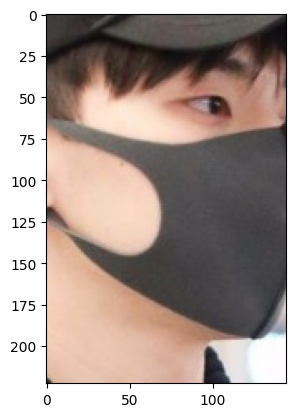

In [ ]:
# Displaying an image of a person wearing a mask
img = mpimg.imread('/content/data/with_mask/with_mask_698.jpg')
plot_img = plt.imshow(img)
plt.show()

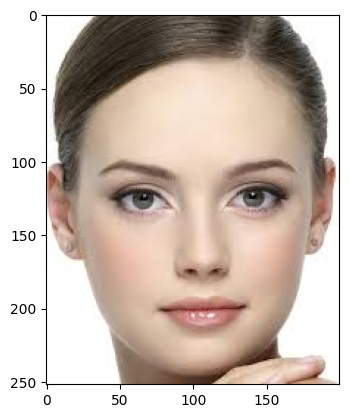

In [ ]:
# Displaying an image of a person without a mask
img = mpimg.imread('/content/data/without_mask/without_mask_656.jpg')
plot_img = plt.imshow(img)
plt.show()

1. Resize the Images
2. Convert the images to numpy arrays

In [ ]:
# Preprocessing images: Resizing and converting to numpy arrays
with_mask_path = '/content/data/with_mask/'
data = []
# Processing "with mask" images
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

# Processing "without mask" images
without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
# Verifying the dataset size
len(data)

7553

array([[[232, 225, 233],
        [232, 225, 233],
        [232, 225, 233],
        ...,
        [228, 225, 232],
        [230, 223, 231],
        [230, 223, 231]],

       [[232, 225, 233],
        [232, 225, 233],
        [232, 225, 233],
        ...,
        [228, 225, 232],
        [230, 223, 231],
        [230, 223, 231]],

       [[232, 225, 233],
        [232, 225, 233],
        [232, 225, 233],
        ...,
        [228, 225, 232],
        [230, 223, 231],
        [230, 223, 231]],

       ...,

       [[229, 222, 230],
        [229, 222, 230],
        [229, 222, 230],
        ...,
        [230, 227, 234],
        [230, 227, 234],
        [231, 228, 235]],

       [[229, 222, 230],
        [229, 222, 230],
        [229, 222, 230],
        ...,
        [230, 227, 234],
        [230, 227, 234],
        [231, 228, 235]],

       [[230, 223, 231],
        [230, 223, 231],
        [230, 223, 231],
        ...,
        [230, 227, 234],
        [229, 226, 233],
        [230, 227, 234]]], dtype=uint8)
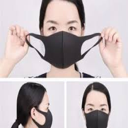

In [ ]:
data[0]

In [ ]:
# Checking the shape of an image array
data[0].shape

(128, 128, 3)

In [ ]:
# Verifying data types
type(data)

list

In [ ]:
type(labels)

list

In [ ]:
# Converting data and labels into numpy arrays for modeling
X = np.array(data)
y = np.array(labels)

In [ ]:
X

array([[[[232, 225, 233],
         [232, 225, 233],
         [232, 225, 233],
         ...,
         [228, 225, 232],
         [230, 223, 231],
         [230, 223, 231]],

        [[232, 225, 233],
         [232, 225, 233],
         [232, 225, 233],
         ...,
         [228, 225, 232],
         [230, 223, 231],
         [230, 223, 231]],

        [[232, 225, 233],
         [232, 225, 233],
         [232, 225, 233],
         ...,
         [228, 225, 232],
         [230, 223, 231],
         [230, 223, 231]],

        ...,

        [[229, 222, 230],
         [229, 222, 230],
         [229, 222, 230],
         ...,
         [230, 227, 234],
         [230, 227, 234],
         [231, 228, 235]],

        [[229, 222, 230],
         [229, 222, 230],
         [229, 222, 230],
         ...,
         [230, 227, 234],
         [230, 227, 234],
         [231, 228, 235]],

        [[230, 223, 231],
         [230, 223, 231],
         [230, 223, 231],
         ...,
         [230, 227, 234],
        

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
# Verifying the processed dataset
print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


## **Splitting the data into Train and Test**

In [ ]:
# Splitting the dataset into training and testing sets with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
print(y.shape, y_train.shape, y_test.shape)

(7553,) (6042,) (1511,)


## **Scaling the data**

In [ ]:
# Scaling the training and testing data to normalize pixel values to the range [0, 1]
X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[254, 255, 237],
        [252, 253, 236],
        [254, 254, 236],
        ...,
        [ 70,  35,  21],
        [ 68,  35,  20],
        [ 61,  31,  15]],

       [[253, 254, 239],
        [253, 254, 239],
        [254, 254, 238],
        ...,
        [ 70,  34,  20],
        [ 69,  36,  21],
        [ 61,  32,  16]],

       [[253, 254, 241],
        [254, 255, 241],
        [254, 255, 241],
        ...,
        [ 69,  33,  19],
        [ 71,  37,  22],
        [ 61,  30,  14]],

       ...,

       [[167, 160, 207],
        [155, 152, 201],
        [148, 146, 195],
        ...,
        [111,  49,  33],
        [110,  46,  29],
        [103,  40,  23]],

       [[163, 158, 206],
        [152, 150, 200],
        [136, 134, 185],
        ...,
        [114,  50,  35],
        [106,  42,  25],
        [104,  42,  25]],

       [[156, 153, 201],
        [139, 138, 189],
        [122, 120, 174],
        ...,
        [113,  47,  32],
        [110,  46,  30],
        [110,  47,  31]]], dtype=uint8)
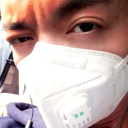

In [ ]:
# Checking the first sample in the training data before and after scaling
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.99607843, 1.        , 0.92941176],
        [0.98823529, 0.99215686, 0.9254902 ],
        [0.99607843, 0.99607843, 0.9254902 ],
        ...,
        [0.2745098 , 0.1372549 , 0.08235294],
        [0.26666667, 0.1372549 , 0.07843137],
        [0.23921569, 0.12156863, 0.05882353]],

       [[0.99215686, 0.99607843, 0.9372549 ],
        [0.99215686, 0.99607843, 0.9372549 ],
        [0.99607843, 0.99607843, 0.93333333],
        ...,
        [0.2745098 , 0.13333333, 0.07843137],
        [0.27058824, 0.14117647, 0.08235294],
        [0.23921569, 0.1254902 , 0.0627451 ]],

       [[0.99215686, 0.99607843, 0.94509804],
        [0.99607843, 1.        , 0.94509804],
        [0.99607843, 1.        , 0.94509804],
        ...,
        [0.27058824, 0.12941176, 0.0745098 ],
        [0.27843137, 0.14509804, 0.08627451],
        [0.23921569, 0.11764706, 0.05490196]],

       ...,

       [[0.65490196, 0.62745098, 0.81176471],
        [0.60784314, 0.59607843, 0.78823529],
        [0.58039216, 0

## **Building a Convolutional Neural Network (CNN)**

In [ ]:
# Importing necessary libraries for building the CNN
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
# Defining the number of output classes (e.g., 2 for binary classification: mask/no mask)
no_of_classes = 2

# Initializing the Sequential model
model = keras.Sequential()

# Adding the first convolutional layer with 32 filters, kernel size 3x3, and ReLU activation
# Input shape is set to (128, 128, 3) for RGB images of size 128x128
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
# Adding the first max pooling layer to downsample the feature maps
model.add(MaxPooling2D(pool_size=(2,2)))

# Adding a second convolutional layer with 64 filters, kernel size 3x3, and ReLU activation
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
# Adding a second max pooling layer to further downsample the feature maps
model.add(MaxPooling2D(pool_size=(2,2)))

# Flattening the feature maps into a 1D vector for the dense layers
model.add(Flatten())

# Adding a dense layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))
# Adding dropout to prevent overfitting
model.add(Dropout(0.5))

# Adding another dense layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))
# Adding dropout to further reduce overfitting
model.add(Dropout(0.5))

# Adding the output layer with 'no_of_classes' neurons and sigmoid activation for binary classification
model.add(Dense(no_of_classes, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling the model with Adam optimizer and sparse categorical cross-entropy loss
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# Training the model on the scaled training data
# Using 10% of the training data for validation and running for 5 epochs
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - acc: 0.6858 - loss: 0.6336 - val_acc: 0.8909 - val_loss: 0.2699
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - acc: 0.8716 - loss: 0.3206 - val_acc: 0.9041 - val_loss: 0.2119
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - acc: 0.9022 - loss: 0.2417 - val_acc: 0.9091 - val_loss: 0.2268
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - acc: 0.9149 - loss: 0.2082 - val_acc: 0.9190 - val_loss: 0.1952
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - acc: 0.9323 - loss: 0.1828 - val_acc: 0.9289 - val_loss: 0.1840


## **Model Evaluation**

In [ ]:
# Evaluating the model's performance on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy = ', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.9211 - loss: 0.1952
Test Accuracy =  0.9073461294174194


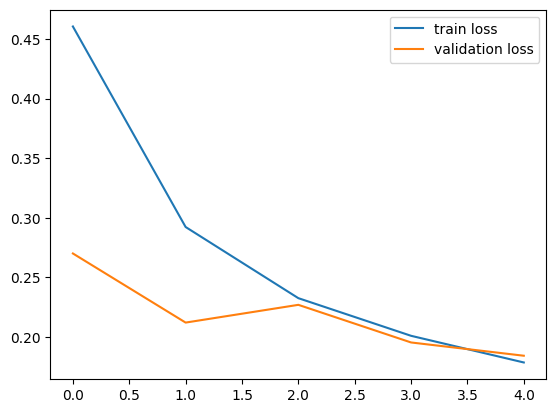

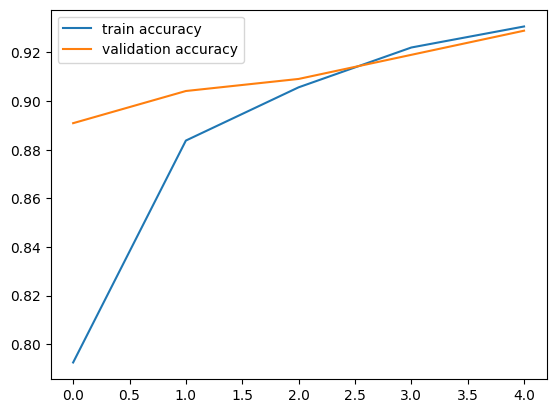

In [ ]:
# Plotting the training and validation loss over epochs
h = history
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# Plotting the training and validation accuracy over epochs
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

## **Predictive System**

Path of the image to be predicted:/content/p1.jpg


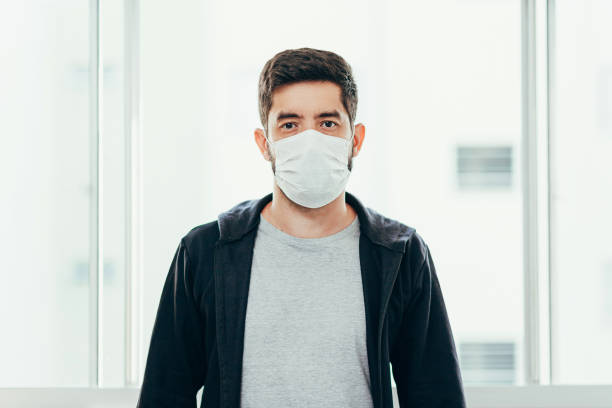

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: [[0.41740623 0.6033886 ]]
Predicted label: 1
The person is wearing a mask


In [ ]:
# Taking input for the image path to be used for prediction
input_img_path = input('Path of the image to be predicted:')

# Reading the image from the given path using OpenCV
input_img = cv2.imread(input_img_path)

# Displaying the input image
cv2_imshow(input_img)

# Resizing the input image to match the model's expected input size (128x128)
input_img_resized = cv2.resize(input_img, (128,128))

# Scaling the resized image to normalize pixel values to the range [0, 1]
input_img_scaled = input_img_resized/255

# Reshaping the image to add a batch dimension (1, 128, 128, 3)
input_img_reshape = np.reshape(input_img_scaled, [1,128,128,3])

# Making a prediction using the trained model
input_prediction = model.predict(input_img_reshape)

# Printing the raw prediction output
print('Prediction:', input_prediction)

# Extracting the predicted label (0 or 1) using argmax
input_pred_label = np.argmax(input_prediction)
print('Predicted label:', input_pred_label)

# Interpreting the predicted label and printing the result
if input_pred_label == 1:
  print('The person is wearing a mask')
else:
  print('The person is not wearing a mask')

In [ ]:
model.save('face_mask_model.h5')

In [ ]:
from google.colab import files
files.download('face_mask_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>